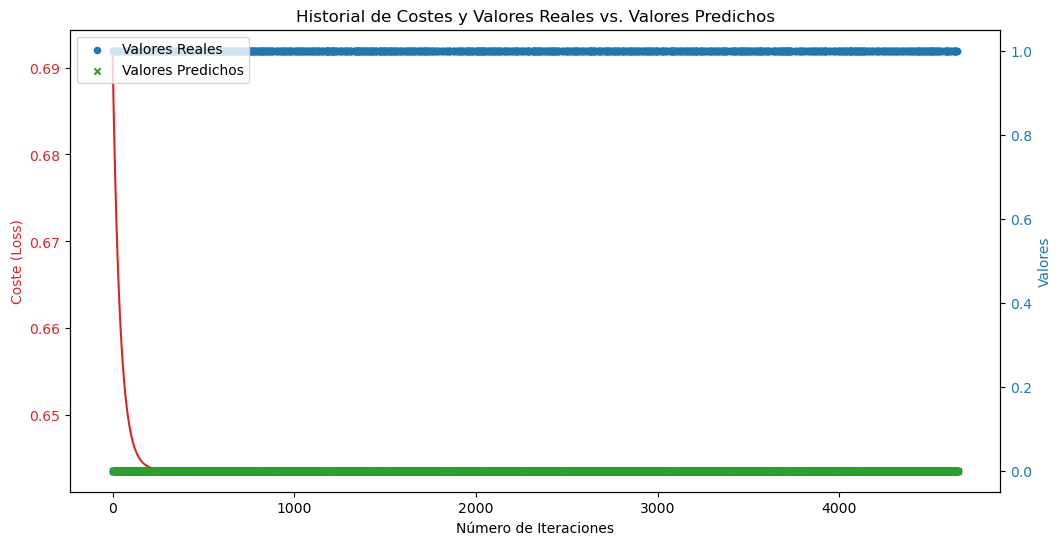

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar el conjunto de datos
data = pd.read_csv("employee.csv")

X = data[["JoiningYear", "PaymentTier", "Age", "ExperienceInCurrentDomain"]].values
y = data["LeaveOrNot"]

# Normalizar las características 
X = (X - X.mean()) / X.std()

# Agregar una columna de unos para el término de sesgo
X = np.column_stack((np.ones(X.shape[0]), X))

# Inicializar los parámetros theta
theta = np.zeros(X.shape[1])

# Definir la tasa de aprendizaje y el número de iteraciones
alpha = 0.01
num_iterations = 4654

# Función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Función de coste
def compute_cost(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

# Gradiente descendente
def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        h = sigmoid(X @ theta)
        gradient = (1 / m) * X.T @ (h - y)
        theta -= alpha * gradient
        cost = compute_cost(theta, X, y)
        cost_history.append(cost)

    return theta, cost_history

# Entrenar el modelo
theta, cost_history = gradient_descent(X, y, theta, alpha, num_iterations)

# Realizar predicciones
y_pred = sigmoid(X @ theta) >= 0.5

# Crear una figura con dos ejes verticales
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel("Número de Iteraciones")
ax1.set_ylabel("Coste (Loss)", color=color)
ax1.plot(range(num_iterations), cost_history, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title("Historial de Costes y Valores Reales vs. Valores Predichos")
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.scatter(range(len(y)), y, label='Valores Reales', color=color, marker='o', s=20)
ax2.scatter(range(len(y)), y_pred, label='Valores Predichos', color='tab:green', marker='x', s=20)
ax2.set_ylabel("Valores", color=color)
ax2.legend(loc='upper left')
ax2.tick_params(axis='y', labelcolor=color)

# Mostrar la figura
plt.show()